# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

Perform customer segmentation using bank data into distinct categories based on their behavioral patterns

## Learning Objectives

At the end of the experiment, you will be able to:

* Understand clustering
* Find groups or clusters using K-means algorithm
* Visualize the high-dimensional data to low-dimensional data (2D) by applying t-SNE algorithm

In [ ]:
#@title  Mini Hackathon Walkthrough
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/Customer_Segmentation.mp4" type="video/mp4">
</video>
""")

## Domain Information

- **Customer segmentation** refers to the process of dividing a set of potential customers into groups (or segments) based on shared attributes, interests, and behaviors.
- One of the key pain points for bank marketing team is to know their customers and identify their needs.
- For this mini-hackathon, we will use the popular **K-Means clustering** algorithm to segment customers based on their behavior from the bank data. The basic concept is that consumers who share common traits would respond to marketing communication in a similar way so that the bank marketing team can reach out to each group in a relevant and effective way.

## Dataset

### Description

The dataset chosen for this mini hackathon is the behavior of customers in the bank for 6 months, this dataset is made up of 13 features.

**Attribute Information**

- **CUSTID:** Identification of Credit Cardholder
- **BALANCE:** Balance amount left in customer's account to make purchases
- **PURCHASES:** Amount of purchases made from the account
- **INSTALLMENTS_PURCHASES:** Amount of purchase done in installment
- **CASH_ADVANCE:** Cash in advance given by the user
- **PURCHASES_FREQUENCY:** How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **CASH_ADVANCE_FREQUENCY:** How frequently the cash in advance being paid
- **CASH_ADVANCE_TRX:** Number of Transactions made with "Cash in Advance"
- **CREDIT_LIMIT:** Limit of Credit Card for user
- **PAYMENTS:** Amount of Payment done by a user
- **MINIMUM_PAYMENTS:** Minimum amount of payments made by a user
- **PRC_FULL_PAYMENT:** Percent of full payment paid by a user
- **TENURE:** Tenure of credit card service for user

**Note:** The currency values mentioned above are in "dollars"

## Grading = 10 Marks

## Setup Steps

In [ ]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()

notebook="U2_MH2_Customer_Segmentation" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Marketing_data_clustering.csv")
    print ("Setup completed successfully")
    return

setup()

Setup completed successfully


### Importing Required Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA

## **Stage 1:** Data Pre-Processing (2 Marks)

- Replace the missing values in any other column appropriately with mean / median / mode.

  Hint: Use pandas [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function to replace the missing values

- Perform correlation on the data features and remove highly correlated features from the data
  
  Hint: Use pandas [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

- Drop any unwanted columns
  
  Hint: Use pandas [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

- Perform `StandardScaler()` on the data features
  
  Hint: Use Sklearns [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [ ]:
customer_df = pd.read_csv('Marketing_data_clustering.csv')

In [ ]:
customer_df.isna().sum()

CUST_ID                    0
BALANCE                    0
PURCHASES                  0
INSTALLMENTS_PURCHASES     0
CASH_ADVANCE               0
PURCHASES_FREQUENCY        0
CASH_ADVANCE_FREQUENCY     0
CASH_ADVANCE_TRX           0
CREDIT_LIMIT               0
PAYMENTS                   0
MINIMUM_PAYMENTS          49
PRC_FULL_PAYMENT           0
TENURE                     0
dtype: int64

In [ ]:
customer_df[customer_df['MINIMUM_PAYMENTS'].isna()].head()

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
13,C10047,2242.311686,437.00,340.0,184.648692,0.333333,0.166667,2,2400.0,0.0,NaN,0.0,12
14,C10049,3910.111237,0.00,0.0,1980.873201,0.000000,0.500000,7,4200.0,0.0,NaN,0.0,12
17,C10057,1311.995984,1283.90,0.0,0.000000,0.250000,0.000000,0,6000.0,0.0,NaN,0.0,12
18,C10058,3625.218146,313.27,0.0,668.468743,0.250000,0.416667,5,4000.0,0.0,NaN,0.0,12
28,C10098,1307.717841,405.60,0.0,0.000000,0.166667,0.000000,0,2400.0,0.0,NaN,0.0,12


In [ ]:
min_payments_median = customer_df['MINIMUM_PAYMENTS'].describe()['50%']
min_payments_median

351.642621

In [ ]:
customer_nafilled_df = customer_df.fillna({'MINIMUM_PAYMENTS': min_payments_median})

In [ ]:
customer_nafilled_df[customer_nafilled_df['MINIMUM_PAYMENTS'].isna()].head()

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [ ]:
customer_nafilled_df['CREDIT_LIMIT'].describe()

In [ ]:
customer_nafilled_df.describe()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.0
mean,1203.715690,375.938988,176.681246,417.120996,0.392006,0.101453,1.777221,3192.027995,815.443883,467.393822,0.028389,12.0
std,1025.943456,443.534594,256.328193,649.995147,0.372497,0.127583,2.423877,2423.088548,696.084869,350.056824,0.068511,0.0
min,1.198223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,2.891346,0.000000,12.0
25%,379.893377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,351.734224,200.538612,0.000000,12.0
50%,1036.419148,219.885000,18.230000,38.941802,0.333333,0.083333,1.000000,2500.000000,601.995631,351.642621,0.000000,12.0
75%,1678.253693,574.552500,291.225000,626.843430,0.750000,0.166667,3.000000,4000.000000,1040.778351,628.032529,0.000000,12.0
max,4940.113918,2315.860000,1170.490000,2780.106659,1.000000,0.500000,10.000000,13500.000000,4138.243604,1801.264841,0.333333,12.0


In [ ]:
customer_df_corr = customer_df.corr()

<ipython-input-447-7f8dfa8915f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  customer_df_corr = customer_df.corr()


<Axes: >

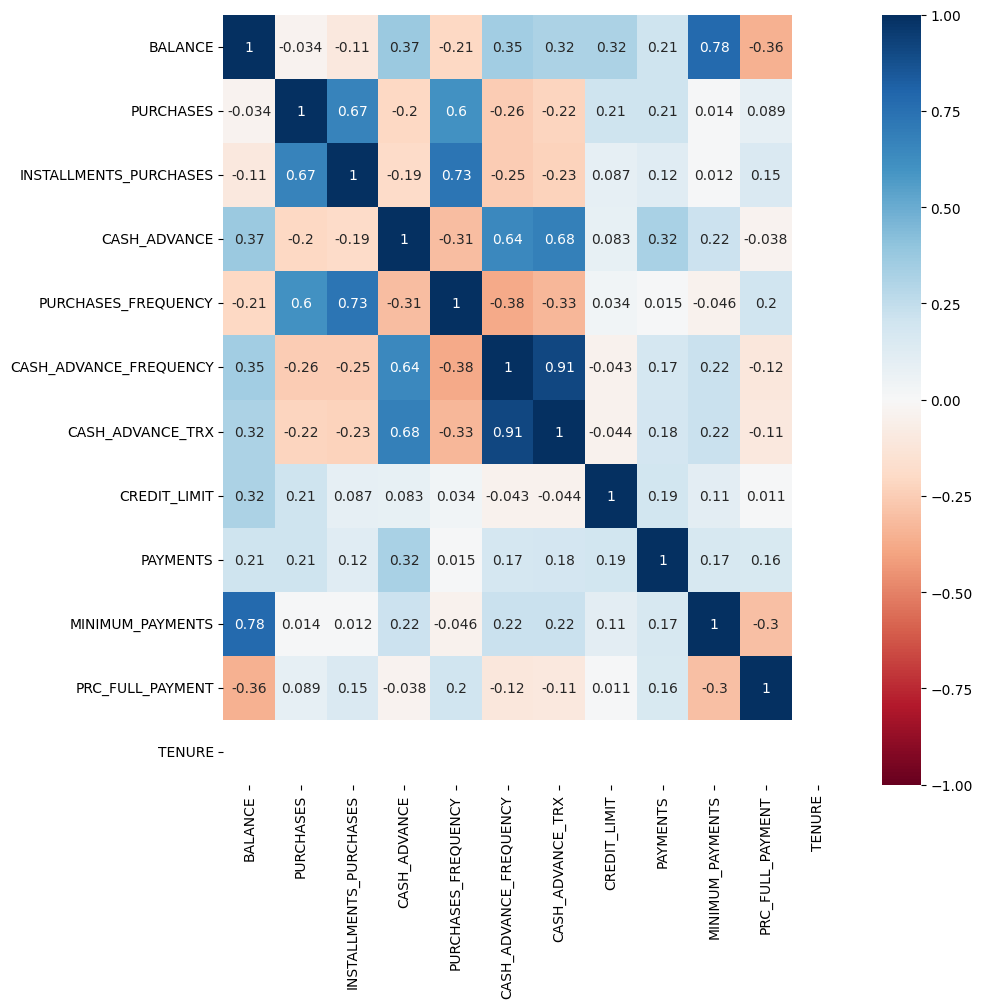

In [ ]:
# sns.heatmap(customer_df_corr)
plt.figure(figsize=(10, 10))
sns.heatmap(customer_df_corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [ ]:
#With this analysis it is clear that we can remove Cash Advance Transactions and keep cash advance frequency
customer_df_corr[customer_df_corr > .70]

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77615,NaN,NaN
PURCHASES,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INSTALLMENTS_PURCHASES,NaN,NaN,1.000000,NaN,0.733458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CASH_ADVANCE,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PURCHASES_FREQUENCY,NaN,NaN,0.733458,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CASH_ADVANCE_FREQUENCY,NaN,NaN,NaN,NaN,NaN,1.00000,0.91079,NaN,NaN,NaN,NaN,NaN
CASH_ADVANCE_TRX,NaN,NaN,NaN,NaN,NaN,0.91079,1.00000,NaN,NaN,NaN,NaN,NaN
CREDIT_LIMIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
PAYMENTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
MINIMUM_PAYMENTS,0.77615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN


In [ ]:
customer_processed_df = customer_nafilled_df.drop(labels=['CUST_ID',
                                                          'TENURE',
                                                          'MINIMUM_PAYMENTS',
                                                          'CASH_ADVANCE_TRX',
                                                          'INSTALLMENTS_PURCHASES',
                                                          'PRC_FULL_PAYMENT'],
                                                  axis='columns')
customer_processed_df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,40.900749,95.40,0.00000,0.166667,0.000000,1000.0,201.802084
1,817.714335,16.00,0.00000,0.083333,0.000000,1200.0,678.334763
2,1823.652743,436.20,0.00000,1.000000,0.000000,2300.0,679.065082
3,1014.926473,861.49,0.00000,0.333333,0.000000,7000.0,688.278568
4,2772.772734,0.00,346.81139,0.000000,0.083333,3000.0,805.647974


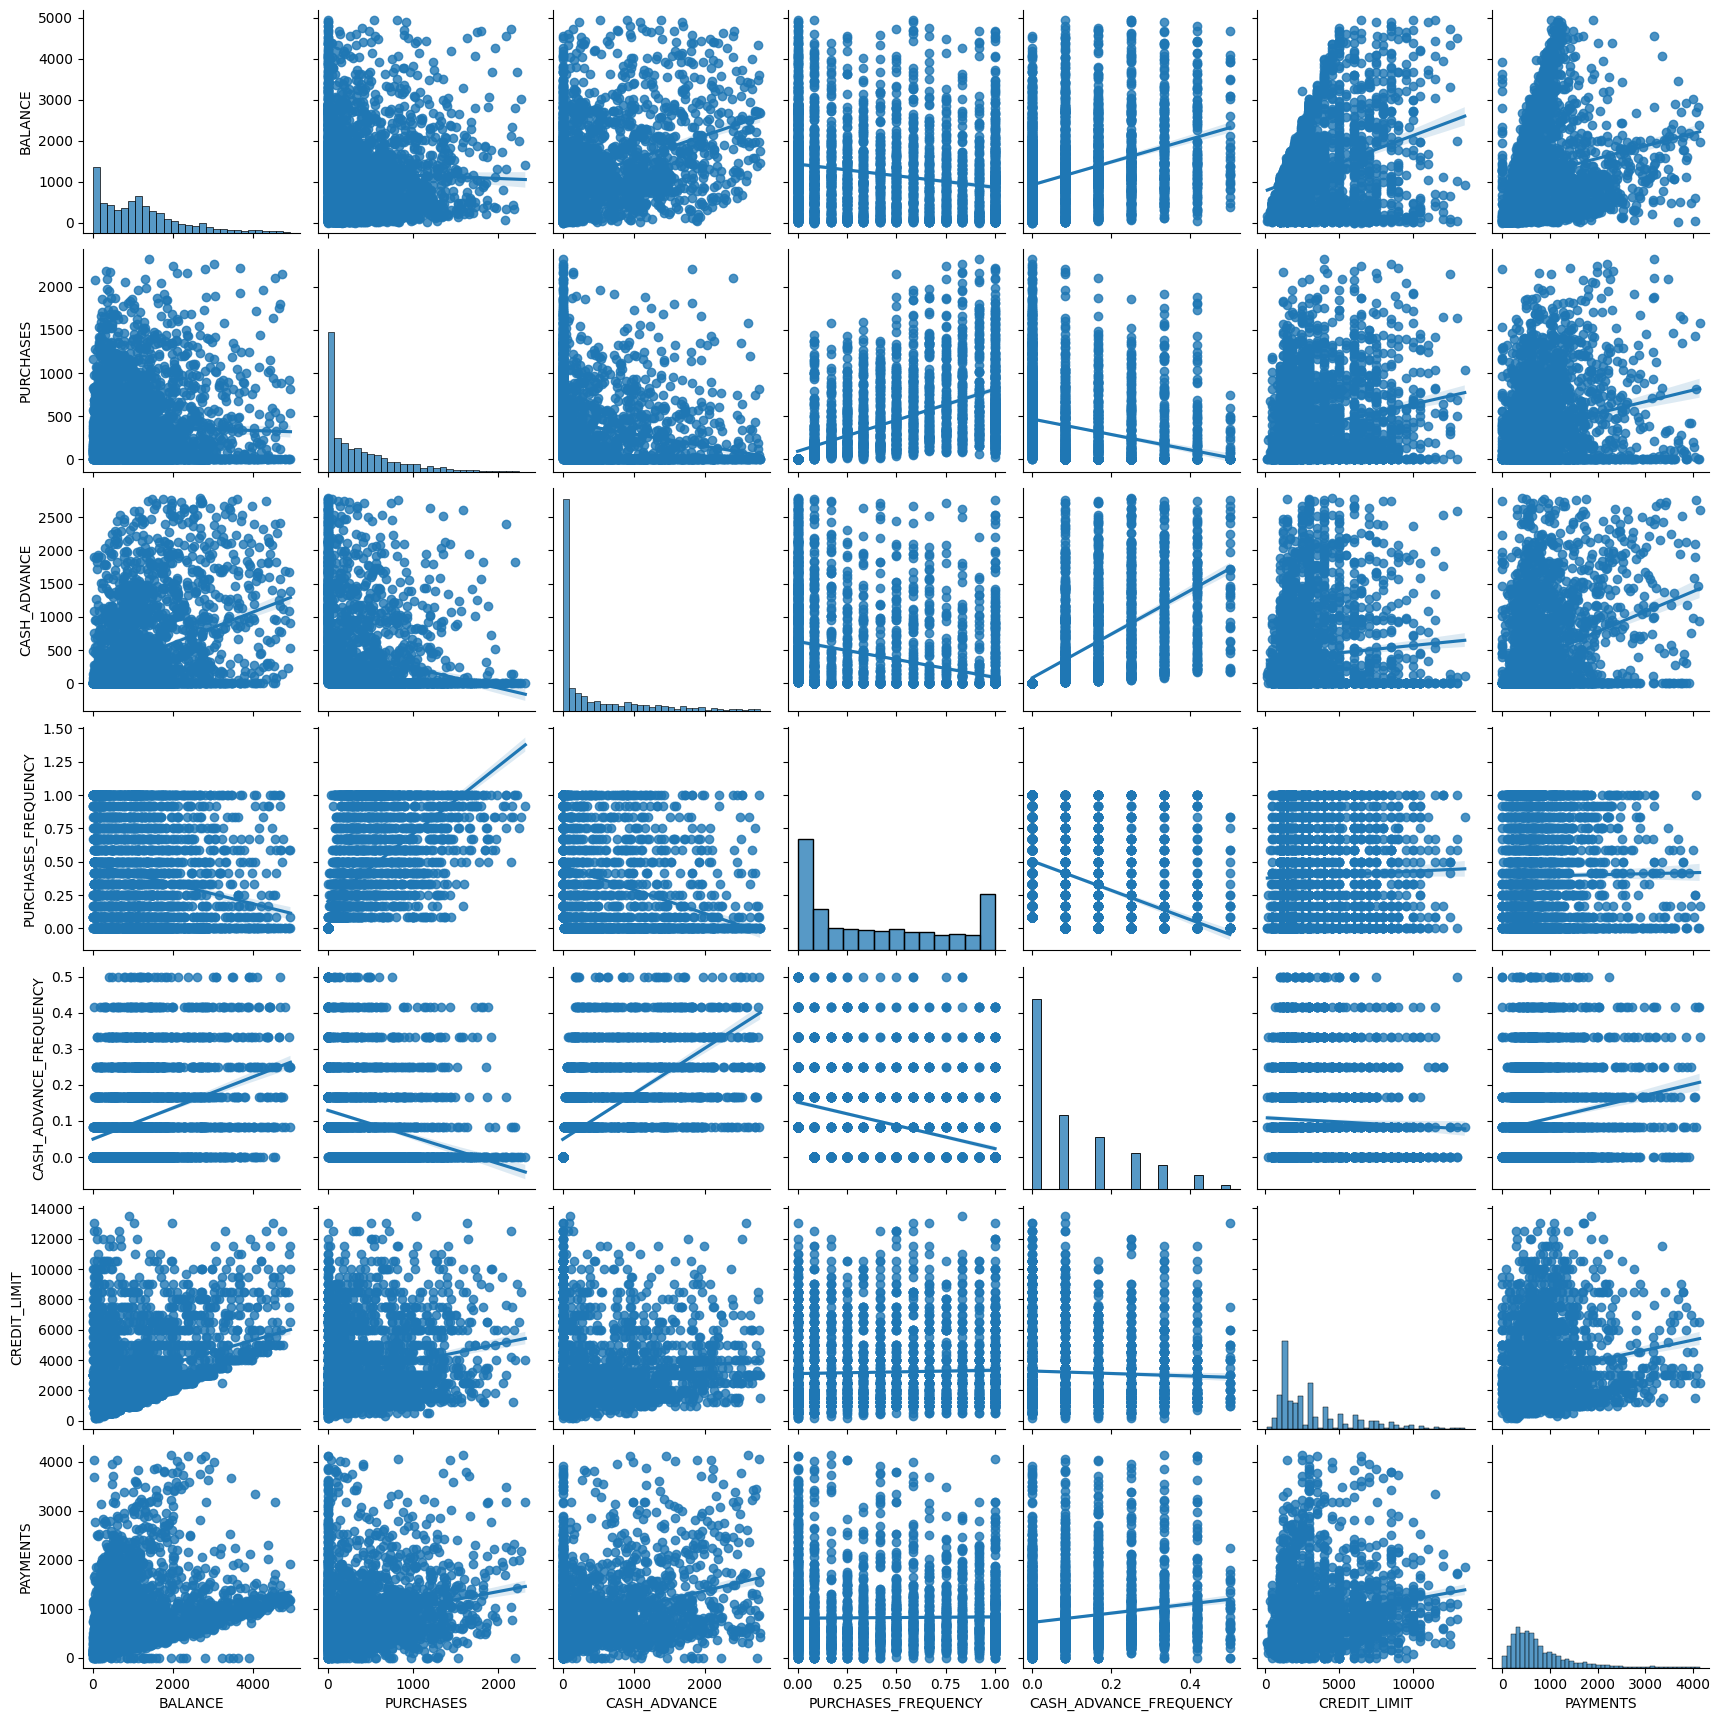

In [ ]:
sns.pairplot(customer_processed_df, kind='reg')

In [ ]:
scaler = StandardScaler()
customer_scaled_features = scaler.fit_transform(customer_processed_df)
customer_scaled_df = pd.DataFrame(customer_scaled_features,
                                    index=customer_processed_df.index,
                                    columns=customer_processed_df.columns)
customer_scaled_df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,-1.133600,-0.632613,-0.641837,-0.605044,-0.795323,-0.904793,-0.881709
1,-0.376303,-0.811660,-0.641837,-0.828798,-0.795323,-0.822240,-0.197005
2,0.604361,0.135888,-0.641837,1.632485,-0.795323,-0.368198,-0.195955
3,-0.184046,1.094914,-0.641837,-0.157540,-0.795323,1.571799,-0.182717
4,1.529635,-0.847739,-0.108188,-1.052550,-0.142048,-0.079263,-0.014075


## **Stage 2:** K Means (3 Marks)

- Find the right number of clusters to be chosen using the elbow method
  
- Perform K-Means on the chosen optimal number of clusters

  **Hint:** Refer to this [link](https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac) for finding the k-clusters using elbow method and applying kmeans

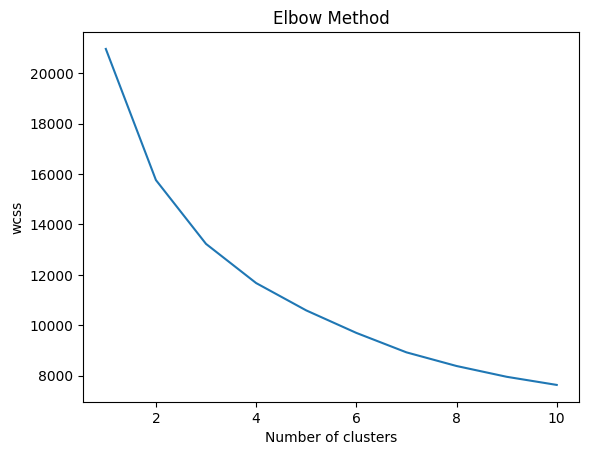

In [ ]:
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i, random_state=42, n_init=10)
    km.fit(customer_scaled_df)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

## **Stage 3:** Apply **TSNE** with 2 components (n_components = 2) and visualize the clusters (3 Marks)

Hint: Use Sklearns [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

**Note:** Produce a visualization with distinctly isolated clusters and It is not necessary to plot the centroids



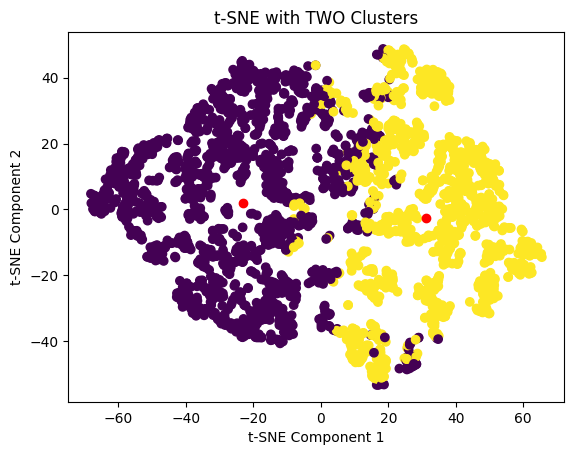

In [ ]:
# Define the model
kmeans2 = KMeans(n_clusters=2, random_state=42, n_init=10)

# Fit the model to the data
kmeans2.fit(customer_scaled_df)
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(customer_scaled_df)

kclusters2 = kmeans2.labels_
# Plot the t-SNE transformed data
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=kclusters2, cmap='viridis')

# Calculate the centroid of each cluster in the t-SNE projection
centroids = np.array([df_tsne[kclusters2 == i].mean(axis=0) for i in range(2)])

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title('t-SNE with TWO Clusters')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


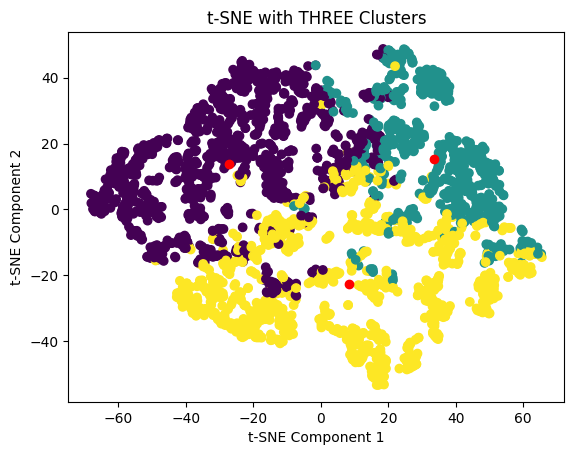

In [ ]:
# Define the model
kmeans3 = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans3.fit(customer_scaled_df)
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(customer_scaled_df)

kclusters3 = kmeans3.labels_
# Plot the t-SNE transformed data
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=kclusters3, cmap='viridis')

# Calculate the centroid of each cluster in the t-SNE projection
centroids = np.array([df_tsne[kclusters3 == i].mean(axis=0) for i in range(3)])

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title('t-SNE with THREE Clusters')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


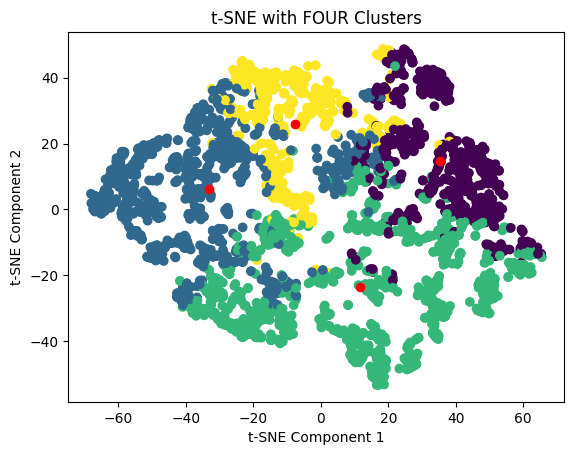

In [ ]:
# Define the model
kmeans4 = KMeans(n_clusters=4, random_state=42)

# Fit the model to the data
kmeans4.fit(customer_scaled_df)
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(customer_scaled_df)

kclusters4 = kmeans4.labels_

# Plot the t-SNE transformed data
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=kclusters4, cmap='viridis')

# Calculate the centroid of each cluster in the t-SNE projection
centroids = np.array([df_tsne[kclusters4 == i].mean(axis=0) for i in range(4)])

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title('t-SNE with FOUR Clusters')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


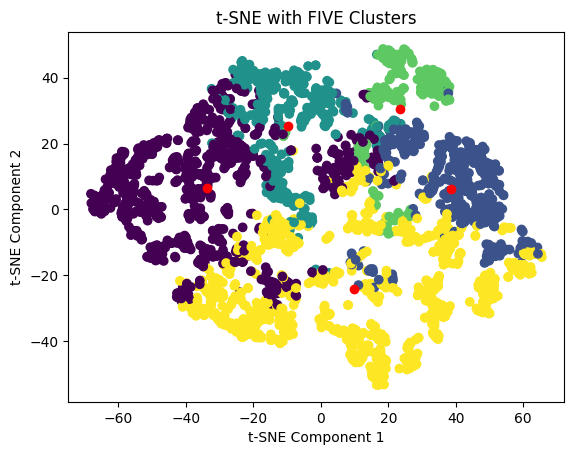

In [ ]:
# Define the model
kmeans5 = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data
kmeans5.fit(customer_scaled_df)
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(customer_scaled_df)

kclusters5 = kmeans5.labels_
# Plot the t-SNE transformed data
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=kclusters5, cmap='viridis')

# Calculate the centroid of each cluster in the t-SNE projection
centroids = np.array([df_tsne[kclusters5 == i].mean(axis=0) for i in range(5)])

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title('t-SNE with FIVE Clusters')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


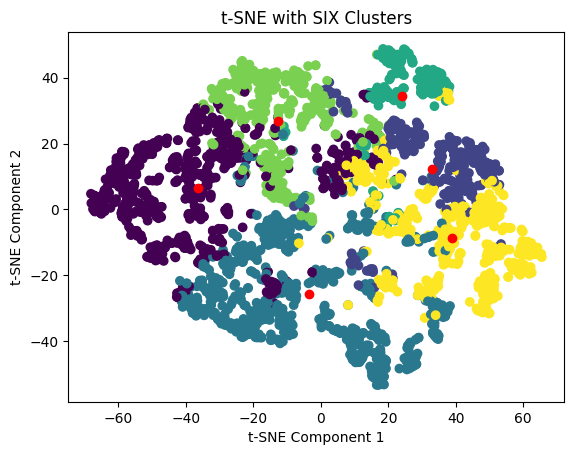

In [ ]:
# Define the model
kmeans6 = KMeans(n_clusters=6, random_state=42)

# Fit the model to the data
kmeans6.fit(customer_scaled_df)
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(customer_scaled_df)

kclusters6 = kmeans6.labels_
# Plot the t-SNE transformed data
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=kclusters6, cmap='viridis')

# Calculate the centroid of each cluster in the t-SNE projection
centroids = np.array([df_tsne[kclusters6 == i].mean(axis=0) for i in range(6)])

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title('t-SNE with SIX Clusters')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.show()

## **Stage 4:** Insights for each cluster

#### **Stage 4(a)** (1 Mark):
- To understand the behavior of the customers from each cluster print the respective centroid point values obtained from the scaled dataframe
- Get the original representation of the scaled centroid points using [inverse_transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform) technique

In [ ]:
kmeans3.cluster_centers_

array([[-0.3267397 ,  0.77194138, -0.52786579,  0.96558345, -0.60780329,
         0.13239135,  0.01524866],
       [ 0.89547179, -0.34227357,  1.501109  , -0.51512521,  1.17570407,
         0.39197796,  0.75441217],
       [-0.16141187, -0.59088227, -0.29060844, -0.69141218, -0.03158525,
        -0.3484236 , -0.42898487]])

In [ ]:
# YOUR CODE HERE
centroids_high_dim2 = scaler.inverse_transform(kmeans2.cluster_centers_)
centroids_high_dim3 = scaler.inverse_transform(kmeans3.cluster_centers_)
centroids_high_dim4 = scaler.inverse_transform(kmeans4.cluster_centers_)
centroids_high_dim5 = scaler.inverse_transform(kmeans5.cluster_centers_)
centroids_high_dim6 = scaler.inverse_transform(kmeans6.cluster_centers_)


In [ ]:
customer_features_inverse_2_df = pd.DataFrame(centroids_high_dim2, columns=customer_scaled_df.columns)
customer_features_inverse_3_df = pd.DataFrame(centroids_high_dim3, columns=customer_scaled_df.columns)
customer_features_inverse_4_df = pd.DataFrame(centroids_high_dim4, columns=customer_scaled_df.columns)
customer_features_inverse_5_df = pd.DataFrame(centroids_high_dim5, columns=customer_scaled_df.columns)
customer_features_inverse_6_df = pd.DataFrame(centroids_high_dim6, columns=customer_scaled_df.columns)

In [ ]:
customer_features_inverse_2_df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,838.353423,546.994006,57.926794,0.582709,0.021614,3241.689809,705.055709
1,1707.213334,140.211859,912.118566,0.129203,0.211477,3123.590151,967.567378


In [ ]:
customer_features_inverse_3_df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,868.555215,718.264513,74.068101,0.751623,0.023920,3512.770379,826.056470
1,2122.265680,224.154174,1392.671601,0.200156,0.251428,4141.666667,1340.491072
2,1038.143895,113.906029,228.258468,0.134500,0.097424,2347.907771,516.883881


In [ ]:
customer_features_inverse_4_df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,2029.816104,192.843064,1479.316607,0.176994,0.260757,3830.034423,1319.744090
1,633.858167,566.570921,75.626549,0.758306,0.025370,2193.661972,622.072439
2,1097.231789,95.221111,247.621389,0.105587,0.105898,2301.073763,520.323983
3,1585.716672,927.428974,129.764918,0.615354,0.036794,6783.966153,1296.486446


In [ ]:
customer_features_inverse_5_df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,649.169624,570.687453,68.867430,0.766242,0.024640,2190.919158,621.605032
1,2462.964053,161.455758,1366.773939,0.157509,0.265201,4357.692308,811.822544
2,1536.548021,961.815703,100.730647,0.627321,0.030504,7030.721003,1166.061165
3,1135.240556,310.047059,1289.203607,0.250754,0.208899,2718.778281,2478.235255
4,1027.850861,101.775790,233.045645,0.113841,0.099390,2258.526012,504.292228


In [ ]:
customer_features_inverse_6_df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,619.588135,525.467450,68.072931,0.813423,0.024497,2087.114094,594.896864
1,3093.942664,222.175496,1469.358636,0.217494,0.229610,5790.425532,947.839803
2,948.176493,151.398922,98.939334,0.158570,0.044431,2543.661137,492.567058
3,1191.249464,313.329271,1343.862421,0.252170,0.198785,2948.958333,2624.529658
4,1342.533877,1067.201638,82.706053,0.669112,0.026487,6174.649922,1149.382697


#### **Stage 4(b)** (1 Mark):
- Report your observations in the form of text, about the customers based on the centroid points

Hint: If require use [clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

# Explanation about Cluster Size being 2

We choose cluster size as 2 because the cluster has distinct features that make both the clusters separate. We deduce this based on the Elbow method as at `k=2`, it has the minimum angle

####*Cluster Names:*####
1. Purchasers
2. Cash Needy

####*About the First Cluster:*####
This cluster defines the purchasers as the frequency of purchase is high with low needs for Cash Advance. Also, the total value of purchases is higher. For this customer we could tie up with several ecommerce players and offer them discount coupons on higher usage of CC.

####*About the Second Cluster:*####
This cluster defines people who use the CC for cash advances and a means of seeking easy personal loans. For this cluster, we could target them by offering them short term loans at attractive interest rates.


# Explanation about Cluster Size being 3

Cash Advance is giving a good categorical insight with Balance, Purchase and Payments if we go with 3 clusters.

####*Category 1:High Purchase / High frequency transactions*
Customers could be targeted for Transaction based campaigns, e.g.: A campaign associated with more transactional offers


####*Category 2:High spending power with Cash withdrawal tendency*
These are High Risk and High returning Customers. We could target them to increase their Credit Limit

####*Category 3: Low Usage of Credit Cards*
Need to focus on users category to encourage using card by providing them offers and may be even education about safe usage of cards online


In [ ]:
kmeans3

KMeans(n_clusters=3, random_state=42)

In [ ]:
customer_features_clustermap_df = customer_features_inverse_3_df.reset_index()
customer_features_clustermap_df.rename(columns={'index': 'cluster'}, inplace=True)
customer_features_clustermap_df.head()

,cluster,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,0,868.555215,718.264513,74.068101,0.751623,0.023920,3512.770379,826.056470
1,1,2122.265680,224.154174,1392.671601,0.200156,0.251428,4141.666667,1340.491072
2,2,1038.143895,113.906029,228.258468,0.134500,0.097424,2347.907771,516.883881


In [ ]:
# customer_scaled_df_3 = customer_features_inverse_3_df.copy()
# customer_scaled_df_3['cluster'] = kmeans3.labels_
# customer_scaled_df_3.head()


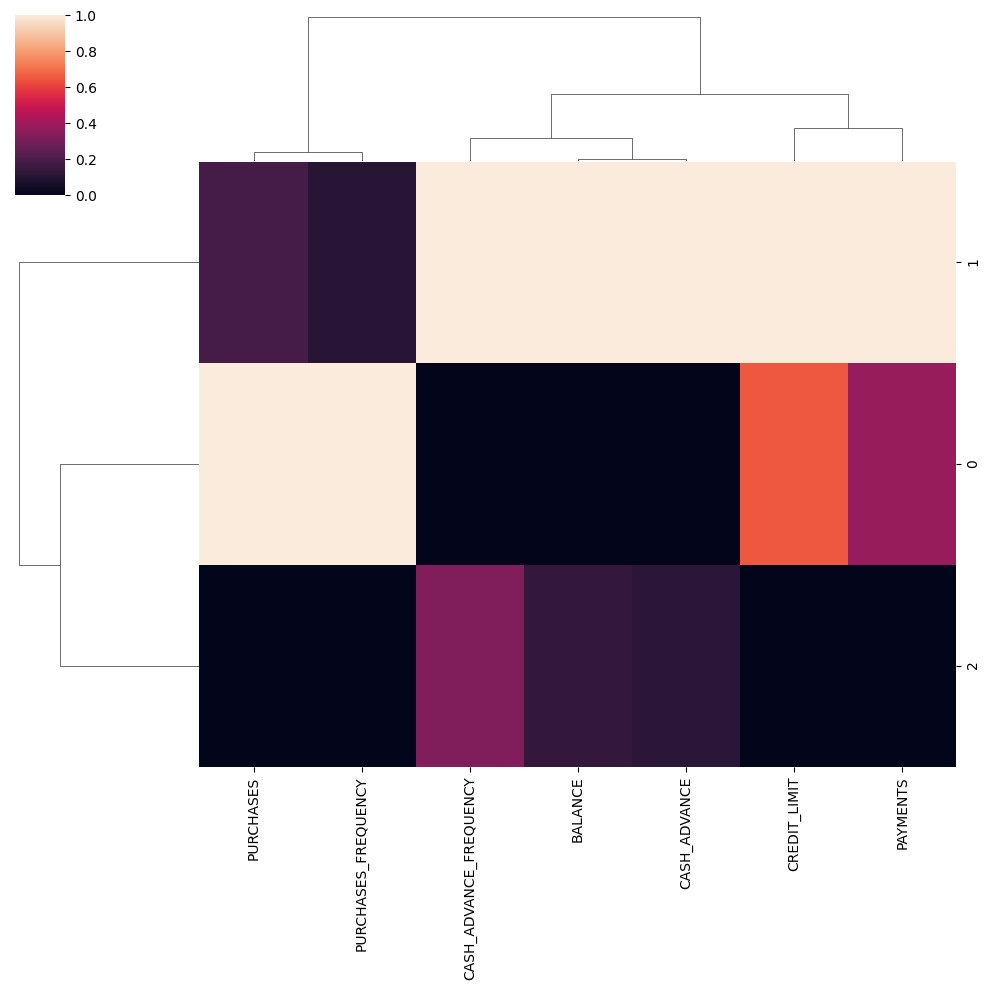

In [ ]:
sns.clustermap(customer_features_clustermap_df.drop('cluster', axis=1), standard_scale=1)

plt.show()